# Predicting Parkinson's Disease in patients using Machine Learning

# -Anvith Pabba

# Importing all the data

In [75]:
#Importing packages
import pandas as pd
import numpy as np
%matplotlib inline



#Importing datasets
df = pd.read_csv('parkinsons.data')

In [54]:
#checking for null values
null_checking = pd.isnull(df)
nulls = np.where(null_checking == 'True')
df.isnull().sum() #1-D array
#No Null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Pre-Processing the Data

In [55]:
#checking for categorical values
df.dtypes
df = df.drop(['name'],axis = 1) #deleting the categorical values
#df.describe() shows the mean, standard deviation, etc...

In [56]:
#splitting into features and targets
X = df.drop(['status'],axis = 1)
Y = df['status']

In [5]:
#getting the names of the features
X_col = list(X)
Y_col = list(Y)

In [6]:
#splitting into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [7]:
'''
#scaling the values
#values of the features vary in magnitudes of order
from sklearn.preprocessing import StandardScaler  

st_x = StandardScaler()
X_train= st_x.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X_col

X_test= st_x.transform(X_test) 
X_test = pd.DataFrame(X_test)
X_test.columns = X_col

#pd.DataFrame(X_train)
'''

'\n#scaling the values\n#values of the features vary in magnitudes of order\nfrom sklearn.preprocessing import StandardScaler  \n\nst_x = StandardScaler()\nX_train= st_x.fit_transform(X_train)\nX_train = pd.DataFrame(X_train)\nX_train.columns = X_col\n\nX_test= st_x.transform(X_test) \nX_test = pd.DataFrame(X_test)\nX_test.columns = X_col\n\n#pd.DataFrame(X_train)\n'

# Checking the Accuracy of the Initial Models

In [8]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Training the XGBoost model
model_xgb=XGBClassifier(use_label_encoder=False)
model_xgb.fit(X_train,Y_train)

#accuracy
Y_pred_1=model_xgb.predict(X_test)
print('\nAccuracy is : ' + str(accuracy_score(Y_test, Y_pred_1)*100))

[17:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy is : 94.87179487179486


# Tuning the Hyper-Parameters of XGBoost

[19:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.197279 using {'learning_rate': 0.1}
-0.686908 (0.001086) with: {'learning_rate': 0.0001}
-0.636385 (0.010114) with: {'learning_rate': 0.001}
-0.374088 (0.047401) with: {'learning_rate': 0.01}
-0.197279 (0.075025) with: {'learning_rate': 0.1}
-0.197455 (0.088837) with: {'learning_rate': 0.2}
-0.204890 (0.093695) with: {'learning_rate': 0.3}


C:\Users\suma\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Text(0, 0.5, 'Log Loss')

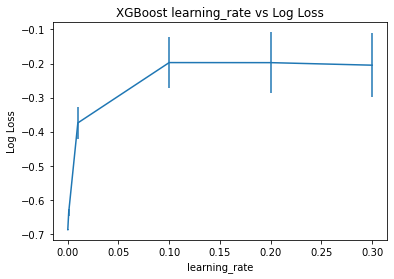

In [77]:
# XGBoost tuning learning_rate
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
# load data df
dataset = df.values
# split data into X and y
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(Y)
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')

C:\Users\suma\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.197279 using {'learning_rate': 0.1, 'n_estimators': 100}
-0.686908 (0.001086) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.680792 (0.002157) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.674789 (0.003225) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.668913 (0.004277) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.663200 (0.005296) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.636423 (0.010115) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
-0.636385 (0.010114) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.589708 (0.018359) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.549127 (0.024368) with: {'lear

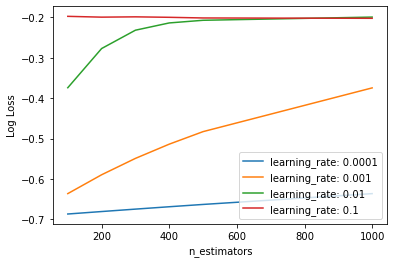

In [78]:
# XGBoost, Tuning learning_rate and n_estimators
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot
import numpy
# load data
dataset = df.values
# split data into X and y
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(Y)
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500, 1000]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

Tuning the XGBoost hyperparameters:

Best Learning rate = 0.1 and 
Best n_estimators = 100

In [12]:
from sklearn.metrics import accuracy_score
predictions = model_dtc.predict(X_test)
accuracy_score(Y_test, predictions)

0.8717948717948718

# Training the XGBoost Model

In [13]:
#training an XGBoost model
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
#DataFlair - Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [15]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [16]:
#DataFlair - Split the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=7)

# XGBoost Model After Tuning the Hyperparameters

We see a big increase in the accuracy, recall, precision, and F1 score

In [17]:
#DataFlair - Train the model
model_xgb=XGBClassifier(learning_rate= 0.1, n_estimators = 100, use_label_encoder=False, gamma = 3)
model_xgb.fit(X_train,Y_train)

[18:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [18]:
# DataFlair - Calculate the accuracy
Y_pred_1=model_xgb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_1)*100)

92.3076923076923


The training accuracy is 97.32%, this is not overfitting, and the test accuracy is also high (92.31%)

In [19]:
#now, we train a random forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000, random_state=42)

rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [20]:
predictions = rf.predict(X_test)

accuracy_score(Y_test, predictions)

0.9230769230769231

# Standardising the dataset

This step is done after pre-processing as its only to help broaden our understanding of the dataset. Not required to further train the model.

In [21]:
from sklearn.preprocessing import StandardScaler  

st_x = StandardScaler()
X_train= st_x.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X_col

X_test= st_x.transform(X_test) 
X_test = pd.DataFrame(X_test)
X_test.columns = X_col

In [22]:
model_dtc_2 = DecisionTreeClassifier()
model_dtc_2.fit(X_train, Y_train);

In [23]:
from sklearn.metrics import accuracy_score
predictions = model_dtc_2.predict(X_test)
accuracy_score(Y_test, predictions)

0.8717948717948718

In [24]:
import xgboost as xgb
xgb_model_2 = xgb.XGBClassifier(learning_rate= 0.1, n_estimators = 100, gamma = 2)

xgb_model_2.fit(X_train, Y_train, early_stopping_rounds=10, eval_set=[(X_test, Y_test)])
predictions_2 = xgb_model_2.predict(X_test)
accuracy_score(Y_test, predictions_2)

[18:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.62791
[1]	validation_0-logloss:0.57448
[2]	validation_0-logloss:0.52531
[3]	validation_0-logloss:0.48505
[4]	validation_0-logloss:0.45320
[5]	validation_0-logloss:0.42499
[6]	validation_0-logloss:0.39890
[7]	validation_0-logloss:0.36823
[8]	validation_0-logloss:0.35130
[9]	validation_0-logloss:0.32784
[10]	validation_0-logloss:0.30643
[11]	validation_0-logloss:0.29480
[12]	validation_0-logloss:0.28210
[13]	validation_0-logloss:0.27319
[14]	validation_0-logloss:0.26496
[15]	validation_0-logloss:0.25264
[16]	validation_0-logloss:0.24048
[17]	validation_0-logloss:0.23050
[18]	validation_0-logloss:0.22034
[19]	validation_0-logloss:0.21348
[20]	validation_0-lo

C:\Users\suma\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9230769230769231

In [25]:
#now, we train a random forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000, random_state=42)

rf.fit(X_train, Y_train);

In [26]:
predictions_3 = rf.predict(X_test)

accuracy_score(Y_test, predictions_3)

0.9230769230769231

In [27]:
#finding the k fold cross validation 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xgb_model_2 = xgb.XGBClassifier(learning_rate= 0.1, n_estimators = 100)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(xgb_model_2, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.905 (0.085)


In [28]:
#deifining a fucntion that returns the confusion matrix, the recall, the precision and the f1-score
def r_p_f1(model, X_test, Y_test):
    predictions = model.predict(X_test)

    df_cm = confusion_matrix(Y_test, predictions)
    plot = sns.heatmap(df_cm, annot=True)
    plot.set(xlabel='Actual', ylabel='Predicted')

    print(classification_report(Y_test, predictions))

    recall = (df_cm[1][1])/(df_cm[1][1] + df_cm[1][0])
    precision = (df_cm[1][1])/(df_cm[1][1] + df_cm[0][1])
    f1 = (2 * recall * precision)/(recall + precision)
    print('\n\nThe recall is: ' + str(recall))
    print('\nThe precision is is: ' + str(precision))
    print('\nThe f1-score is: ' + str(f1) + '\n')

In [62]:
#Recall, Precision and F1 score of xgboosted model

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df_cm = confusion_matrix(Y_test, Y_pred_1)
plot = sns.heatmap(df_cm, annot=True)
plot.set(xlabel='Actual', ylabel='Predicted')

print(classification_report(Y_test, predictions_2))

recall = (df_cm[1][1])/(df_cm[1][1] + df_cm[1][0])
precision = (df_cm[1][1])/(df_cm[1][1] + df_cm[0][1])
f1 = (2 * recall * precision)/(recall + precision)
print('\n\nThe recall is: ' + str(recall))
print('\nThe precision is is: ' + str(precision))
print('\nThe f1-score is: ' + str(f1) + '\n')

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



The recall is: 0.96875

The precision is is: 0.9393939393939394

The f1-score is: 0.9538461538461539



In [30]:
#Recall, Precision and F1 score of Decision tree

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df_cm = confusion_matrix(Y_test, predictions_2)
plot = sns.heatmap(df_cm, annot=True)
plot.set(xlabel='Actual', ylabel='Predicted')

print(classification_report(Y_test, predictions_2))

recall = (df_cm[1][1])/(df_cm[1][1] + df_cm[1][0])
precision = (df_cm[1][1])/(df_cm[1][1] + df_cm[0][1])
f1 = (2 * recall * precision)/(recall + precision)
print('\n\nThe recall is: ' + str(recall))
print('\nThe precision is is: ' + str(precision))
print('\nThe f1-score is: ' + str(f1) + '\n')

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



The recall is: 0.96875

The precision is is: 0.9393939393939394

The f1-score is: 0.9538461538461539



In [31]:
#Recall, Precision and F1 score of random forest

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df_cm = confusion_matrix(Y_test, predictions_3)
plot = sns.heatmap(df_cm, annot=True)
plot.set(xlabel='Actual', ylabel='Predicted')

print(classification_report(Y_test, predictions_2))

recall = (df_cm[1][1])/(df_cm[1][1] + df_cm[1][0])
precision = (df_cm[1][1])/(df_cm[1][1] + df_cm[0][1])
f1 = (2 * recall * precision)/(recall + precision)
print('\n\nThe recall is: ' + str(recall))
print('\nThe precision is is: ' + str(precision))
print('\nThe f1-score is: ' + str(f1) + '\n')

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



The recall is: 1.0

The precision is is: 0.9142857142857143

The f1-score is: 0.955223880597015



# Correlation Map to check for Redundant Features

In [32]:
#Now we get the correlation map

plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot=True);

In [33]:
#function that returns all the redundant features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [34]:
#dropping the redundant features
col_ = correlation(X_train, 0.9)
X_train = X_train.drop(columns = col_)
X_test = X_test.drop(columns = col_)

In [35]:
#finding the accuracy of the new model using decision trees after removing redundant features
model = DecisionTreeClassifier()
model.fit(X_train, Y_train);

predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)

0.9230769230769231

In [36]:
#finding the accuracy of the new model using XGBoost after removing redundant features
xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)])
predictions_2 = xgb_model.predict(X_test)
accuracy_score(Y_test, predictions_2)

[18:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.49985
[1]	validation_0-logloss:0.39244
[2]	validation_0-logloss:0.32538
[3]	validation_0-logloss:0.27212
[4]	validation_0-logloss:0.23168
[5]	validation_0-logloss:0.19698
[6]	validation_0-logloss:0.16914
[7]	validation_0-logloss:0.16122
[8]	validation_0-logloss:0.15000
[9]	validation_0-logloss:0.14893
[10]	validation_0-logloss:0.13984
[11]	validation_0-logloss:0.13313
[12]	validation_0-logloss:0.13636
[13]	validation_0-logloss:0.13277
[14]	validation_0-logloss:0.13589
[15]	validation_0-logloss:0.12908
[16]	validation_0-logloss:0.12040
[17]	validation_0-logloss:0.12048
[18]	validation_0-logloss:0.11463
[19]	validation_0-logloss:0.11548
[20]	validation_0-lo

C:\Users\suma\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[80]	validation_0-logloss:0.08667


0.9487179487179487

In [37]:
#Mean Absolute Error of the data set

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(Y_train)
# Get predictions on the test set
from sklearn.metrics import mean_absolute_error
baseline_predictions = np.ones(Y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(Y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
model = xgb.train(
    params,
    dtrain,
    num_boost_round=999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Baseline MAE is 0.35
[18:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.37582
[1]	Test-mae:0.28827
[2]	Test-mae:0.22984
[3]	Test-mae:0.18569
[4]	Test-mae:0.15222
[5]	Test-mae:0.12671
[6]	Test-mae:0.11025
[7]	Test-mae:0.09894
[8]	Test-mae:0.09260
[9]	Test-mae:0.08667
[10]	Test-mae:0.08273
[11]	Test-mae:0.08022
[12]	Test-mae:0.07931
[13]	Test-mae:0.07796
[14]	Test-mae:0.07738
[15]	Test-mae:0.07709
[16]	Test-mae:0.07677
[17]	Test-mae:0.07622
[18]	Test-mae:0.07581
[19]	Test-mae:0.07561
[20]	Test-mae:0.07532
[21]	Test-mae:0.07530
[22]	Test-mae:0.07519
[23]	Test-mae:0.07514
[24]	Test-mae:0.07508
[25]	Test-mae:0.07501
[26]	Test-mae:0.07504
[27]	Test-mae:0.07504
[28]	Test-mae:0.07507
[29]	Test-mae:0.07497
[30]	Test-mae:0.07495
[31]	Test-mae:0.07493
[32]	Test-mae:0.07491
[33]	Test-mae:0.07491
[34]	Test-mae:0.07491
[35]	Test-mae:0.07491
[36]	Test-mae:0.0749

# Removing the Outliers

This pair-plot gives us a clear idea of how didnt features are related to one another and we can check for the outliers and remove them if necessary

C:\Users\suma\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\suma\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


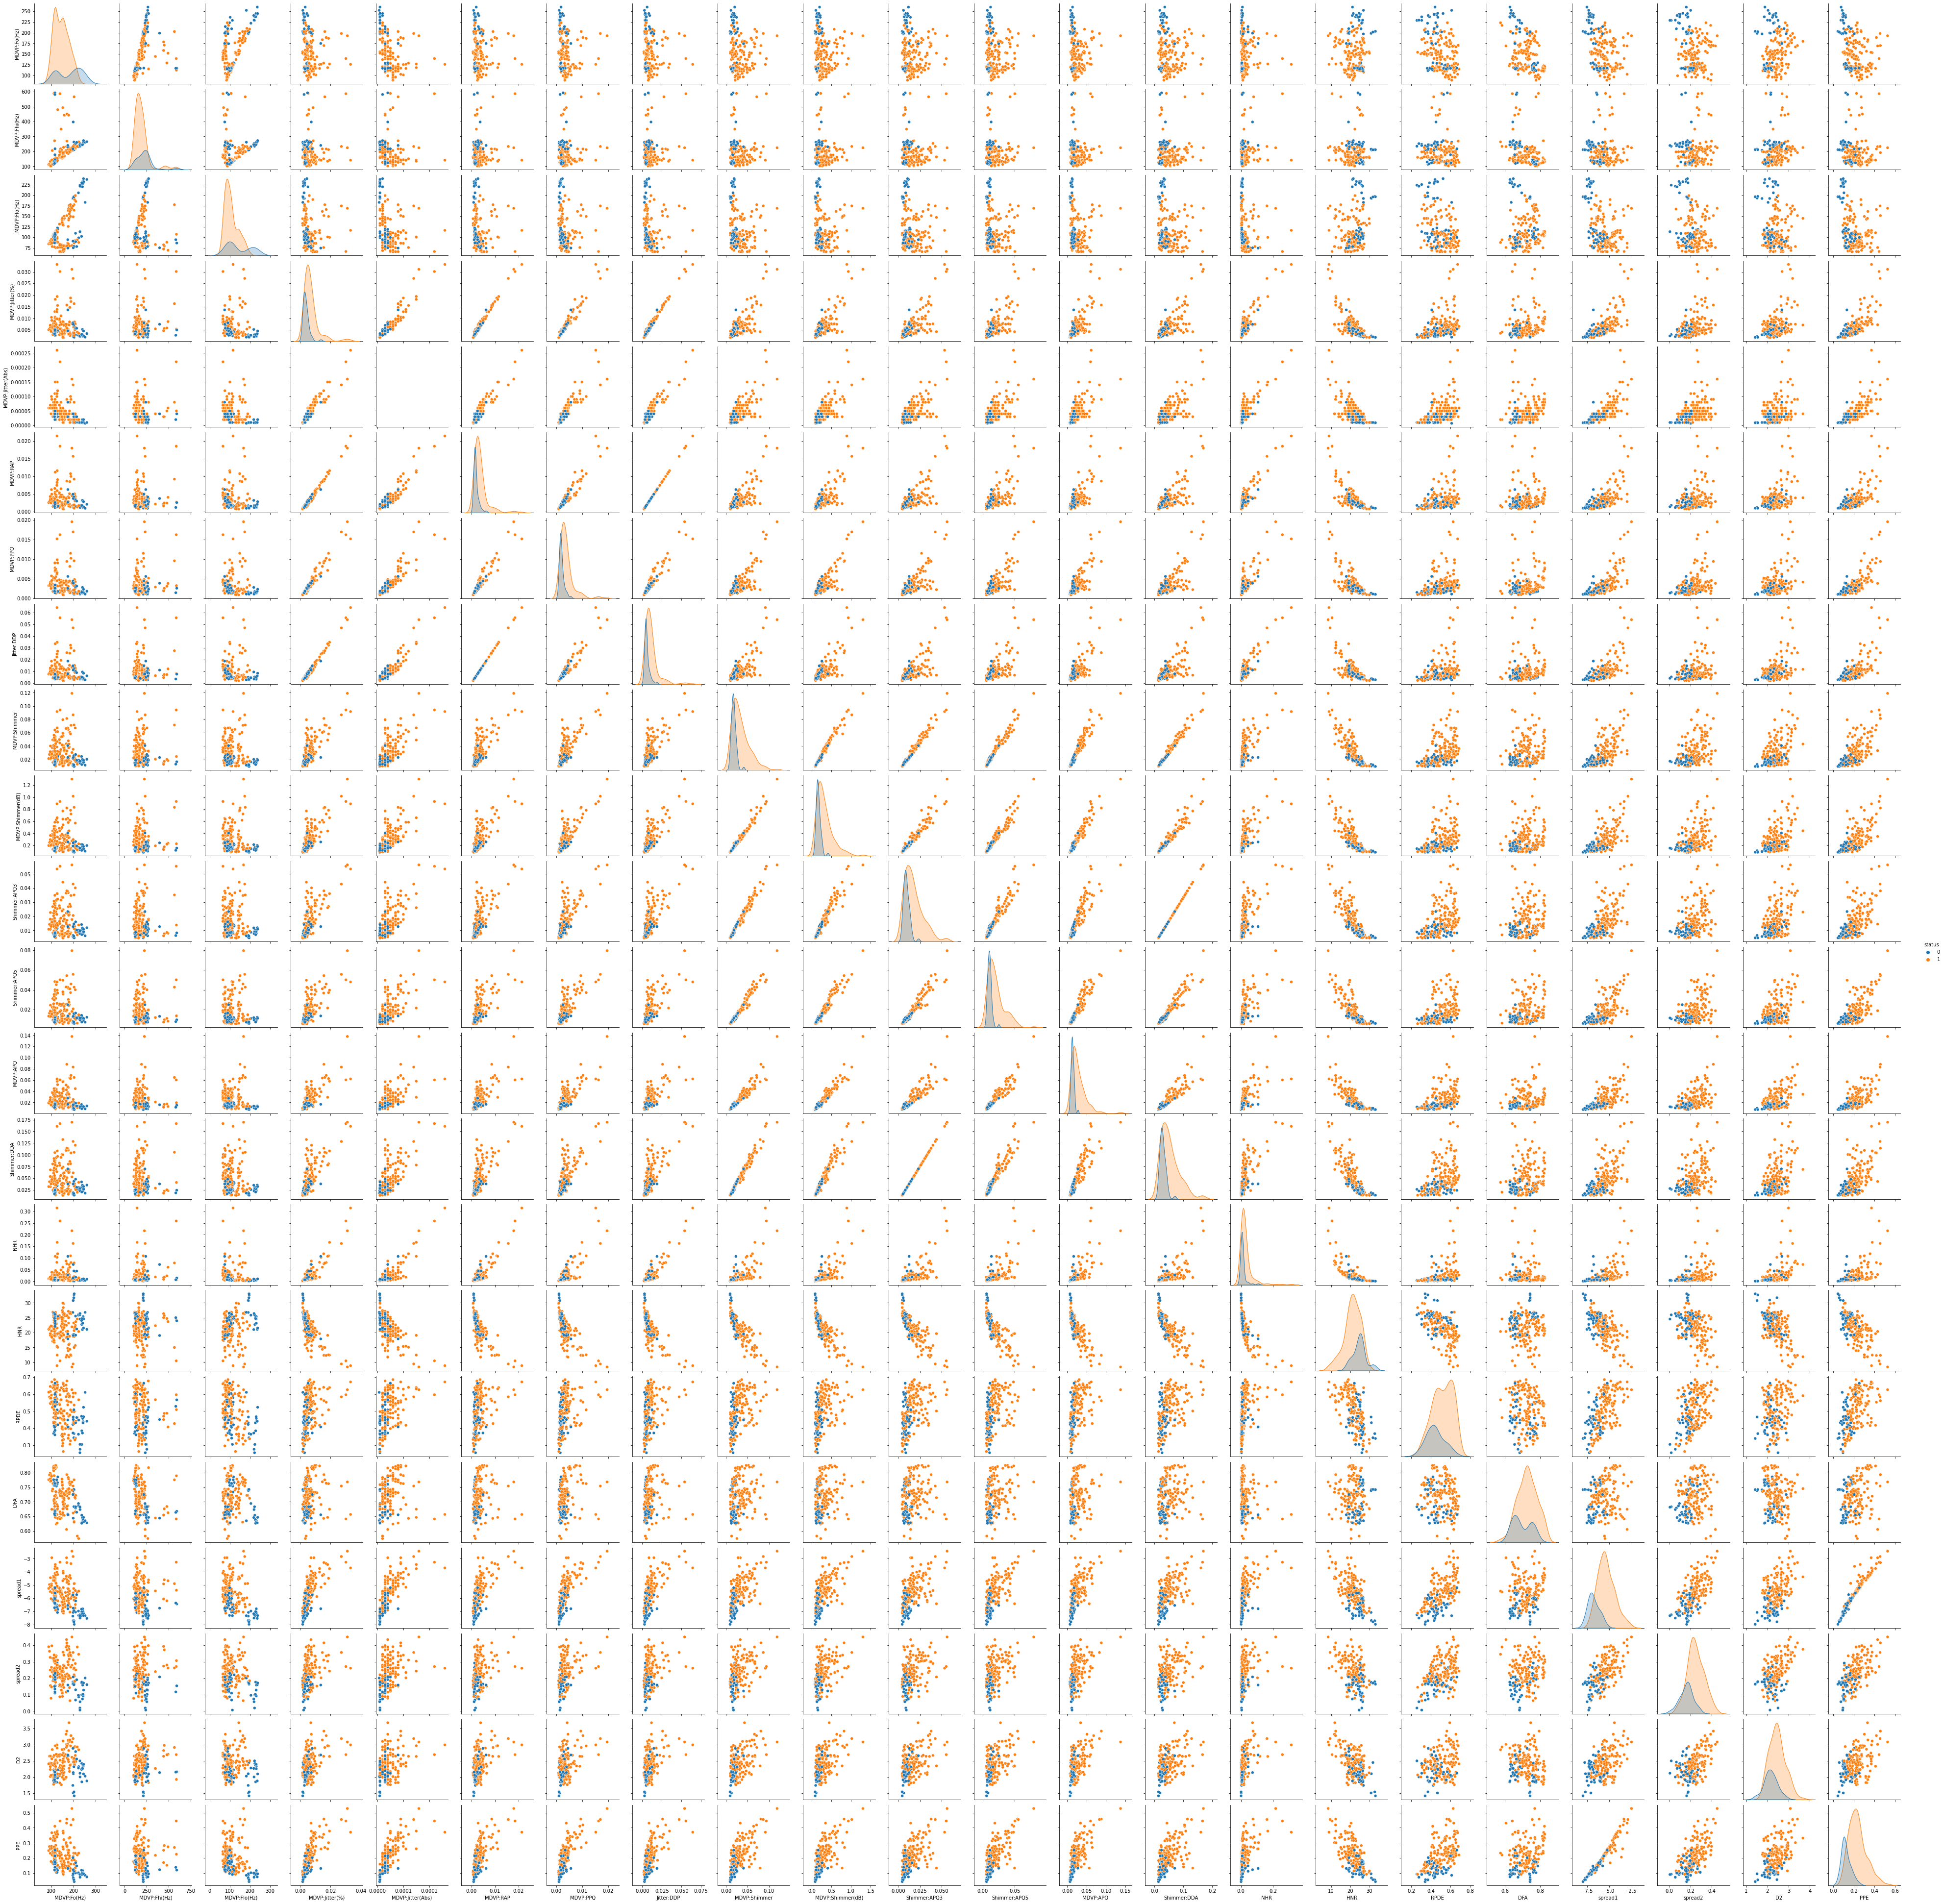

In [76]:
sns.pairplot(df, hue = 'status')

In [39]:
#finding the outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(X_train)) #cz is the variable that contains all the z-scores
threshold = 3
print(np.where(z > 3)) #z-score outliers

(array([ 13,  96,  98, 105, 105, 111, 115, 127, 127, 145, 152, 152, 152],
      dtype=int64), array([ 1,  1,  1,  3,  4,  1,  1,  3,  4, 10,  3,  4,  5], dtype=int64))


In [40]:
#finding the outliers using IQR method
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(X_train < (Q1 - 1.5 * IQR)) or (X_train > (Q3 + 1.5 * IQR)) #IQR outliers

MDVP:Fo(Hz)       1.619317
MDVP:Fhi(Hz)      1.075608
MDVP:Flo(Hz)      1.301156
MDVP:Jitter(%)    0.790834
MDVP:Shimmer      1.126534
HNR               1.331712
RPDE              1.655200
DFA               1.632249
spread1           1.217895
spread2           1.164787
D2                1.268412
dtype: float64
     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Shimmer  \
0          False         False         False           False         False   
1          False         False         False           False         False   
2          False         False         False           False         False   
3          False         False         False           False         False   
4          False         False         False           False         False   
..           ...           ...           ...             ...           ...   
151        False         False         False           False         False   
152        False         False         False           False    

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Shimmer  \
0          False         False         False           False         False   
1          False         False         False           False         False   
2          False         False         False           False         False   
3          False         False         False           False         False   
4          False         False         False            True         False   
..           ...           ...           ...             ...           ...   
151        False         False         False           False         False   
152        False         False         False            True          True   
153        False         False         False           False         False   
154        False         False         False           False         False   
155        False         False         False           False         False   

       HNR   RPDE    DFA  spread1  spread2     D2  
0    False  False  False    False    False  False  
1    False  False  False    False    False  False  
2    False  False  False    False    False  False  
3    False  False  False    False    False  False  
4    False  False  False    False    False  False  
..     ...    ...    ...      ...      ...    ...  
151  False  False  False    False    False  False  
152  False  False  False     True     True  False  
153  False  False  False    False    False  False  
154  False  False  False    False    False  False  
155  False  False  False    False    False  False  

[156 rows x 11 columns]

In [41]:
X_train_2 =X_train[(z < 3).all(axis=1)]
Y_train_2 =Y_train[(z < 3).all(axis=1)]

print(X_train.shape)
print(X_train_2.shape)
X_train_2
#it can be seen that 9 outliers have been removed

(156, 11)
(147, 11)


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Shimmer  \
0      -0.168199      0.226292     -0.837918       -0.235833     -0.522964   
1       0.775728      0.089020      1.294556       -0.654790     -0.748590   
2      -0.999001     -0.800302     -0.340481       -0.286616      1.458713   
3       1.089385      0.236434      1.617318       -0.775399     -1.004016   
4       0.788500      0.267059      0.668432        2.675707      1.558223   
..           ...           ...           ...             ...           ...   
150    -0.133940     -0.320344      0.509509       -0.314123      0.685518   
151    -0.086261     -0.450150     -0.980043       -0.760587     -0.942288   
153    -0.405296     -0.300111     -1.187958        0.667676      0.111343   
154    -1.187196      0.192540     -0.921774        0.054052      0.460425   
155    -0.923594     -0.844071     -0.239494       -0.582848     -0.744333   

          HNR      RPDE       DFA   spread1   spread2        D2  
0    0.682621 -1.347734  0.124668 -0.498051 -0.345706 -0.090912  
1    1.067240 -1.656173  0.849925 -0.832828 -0.286107  0.063808  
2   -1.068378  1.347361 -0.345202  0.069683  0.966271  0.180576  
3    1.997281 -0.644132  0.411320 -1.755303 -0.617658 -0.636512  
4   -2.160804  0.075908  0.796012  1.094693  1.375004  1.575085  
..        ...       ...       ...       ...       ...       ...  
150 -0.749029 -0.433957  0.270795 -0.213226 -1.637988 -0.013048  
151  1.053011 -1.938813  0.044718 -1.038685 -1.620954 -0.892511  
153 -0.478237 -0.016672  0.169611  0.345926 -0.231616 -0.149454  
154 -0.006893  0.218413  0.334888  0.125584  0.140722  1.284466  
155  0.882722 -0.896744  0.768636 -0.226344 -0.323791 -0.967974  

[147 rows x 11 columns]

In [42]:
#for xgboost
xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train_2, Y_train_2, early_stopping_rounds=4, eval_set=[(X_test, Y_test)])
predictions_2 = xgb_model.predict(X_test)
print(accuracy_score(Y_test, predictions_2))

r_p_f1(xgb_model, X_test, Y_test)

[18:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50641
[1]	validation_0-logloss:0.40792
[2]	validation_0-logloss:0.33757
[3]	validation_0-logloss:0.29339
[4]	validation_0-logloss:0.26742
[5]	validation_0-logloss:0.22856
[6]	validation_0-logloss:0.21172
[7]	validation_0-logloss:0.19340
[8]	validation_0-logloss:0.18392
[9]	validation_0-logloss:0.17260
[10]	validation_0-logloss:0.17638
[11]	validation_0-logloss:0.15830
[12]	validation_0-logloss:0.16304
[13]	validation_0-logloss:0.15245
[14]	validation_0-logloss:0.14794
[15]	validation_0-logloss:0.14645
[16]	validation_0-logloss:0.13390
[17]	validation_0-logloss:0.13367
[18]	validation_0-logloss:0.12996
[19]	validation_0-logloss:0.12965
[20]	validation_0-lo

C:\Users\suma\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



The recall is: 1.0

The precision is is: 0.9411764705882353

The f1-score is: 0.9696969696969697



In [43]:
#for decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train_2, Y_train_2);

predictions = model.predict(X_test)
print('The accuracy is: ' + str(accuracy_score(Y_test, predictions)) + '\n')

r_p_f1(model, X_test, Y_test)

The accuracy is: 0.9230769230769231

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



The recall is: 0.96875

The precision is is: 0.9393939393939394

The f1-score is: 0.9538461538461539



In [44]:
#now, we train a random forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000, random_state=42)

rf = rf.fit(X_train_2, Y_train_2);

predictions_3 = rf.predict(X_test)

print(accuracy_score(Y_test, predictions_3))

r_p_f1(rf, X_test, Y_test)

0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



The recall is: 1.0

The precision is is: 0.9411764705882353

The f1-score is: 0.9696969696969697



# K-Fold Cross Validation accuracies

In [45]:
#finding the k fold cross validation 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBClassifier(random_state=42)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(xgb_model, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.883 (0.079)


In [46]:
rf_2 = RandomForestClassifier(n_estimators= 1000, random_state=42)
rf_2 = rf_2.fit(X_train_2, Y_train_2);

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf_2, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.870 (0.073)


In [47]:
#for xgboost
xgb_model_2 = xgb.XGBClassifier(random_state=42)

xgb_model_2.fit(X_train_2, Y_train_2, early_stopping_rounds=4, eval_set=[(X_test, Y_test)])
predictions_2 = xgb_model_2.predict(X_test)
print(accuracy_score(Y_test, predictions_2))

r_p_f1(xgb_model_2, X_test, Y_test)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(xgb_model_2, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[18:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50641
[1]	validation_0-logloss:0.40792
[2]	validation_0-logloss:0.33757
[3]	validation_0-logloss:0.29339
[4]	validation_0-logloss:0.26742
[5]	validation_0-logloss:0.22856
[6]	validation_0-logloss:0.21172
[7]	validation_0-logloss:0.19340
[8]	validation_0-logloss:0.18392
[9]	validation_0-logloss:0.17260
[10]	validation_0-logloss:0.17638
[11]	validation_0-logloss:0.15830
[12]	validation_0-logloss:0.16304
[13]	validation_0-logloss:0.15245
[14]	validation_0-logloss:0.14794
[15]	validation_0-logloss:0.14645
[16]	validation_0-logloss:0.13390
[17]	validation_0-logloss:0.13367
[18]	validation_0-logloss:0.12996
[19]	validation_0-logloss:0.12965
[20]	validation_0-lo

C:\Users\suma\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



The recall is: 1.0

The precision is is: 0.9411764705882353

The f1-score is: 0.9696969696969697

Accuracy: 0.883 (0.079)


# Principle component analysis

In [48]:
#Principle component analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 


pca = PCA(n_components=3)
pca.fit_transform(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

print(pca.explained_variance_ratio_)
data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3']))

[0.72899269 0.21824461 0.05112088]
      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1     0.222365      0.971438      0.082819        0.000004   
PC-2     0.589844     -0.201669      0.781721       -0.000018   
PC-3    -0.776168      0.125049      0.617436        0.000009   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1     -2.831369e-08  0.000003  0.000002    0.000008     -0.000003   
PC-2     -2.432388e-07 -0.000008 -0.000008   -0.000024     -0.000053   
PC-3      2.497855e-07  0.000004  0.000009    0.000011     -0.000024   

      MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
PC-1          0.000061  ... -0.000001    -0.000006  0.000065 -0.000460   
PC-2         -0.000500  ... -0.000037    -0.000086 -0.000113  0.015468   
PC-3         -0.000136  ... -0.000012    -0.000057 -0.000028  0.025935   

          RPDE       DFA   spread1   spread2        D2       PPE  
PC-1 -0.000178 -0.000220 -0.001501 -0.000033  0.000

# THANKS FOR READING :) - Anvith Pabba, IITM